In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
j2010 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2010-06-01' AND '2010-06-30') ORDER BY Measurement.date").fetchall()
j2011 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2011-06-01' AND '2011-06-30') ORDER BY Measurement.date").fetchall()
j2012 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2012-06-01' AND '2012-06-30') ORDER BY Measurement.date").fetchall()
j2013 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2013-06-01' AND '2013-06-30') ORDER BY Measurement.date").fetchall()
j2014 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2014-06-01' AND '2014-06-30') ORDER BY Measurement.date").fetchall()
j2015 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2015-06-01' AND '2015-06-30') ORDER BY Measurement.date").fetchall()
j2016 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2016-06-01' AND '2016-06-30') ORDER BY Measurement.date").fetchall()
j2017 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2017-06-01' AND '2017-06-30') ORDER BY Measurement.date").fetchall()

j2010

[('2010-06-01', 78.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 73.0),
 ('2010-06-01', 77.0),
 ('2010-06-01', 69.0),
 ('2010-06-01', 76.0),
 ('2010-06-01', 71.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 72.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 71.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 78.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 75.0),
 ('2010-06-03', 74.0),
 ('2010-06-03', 77.0),
 ('2010-06-03', 67.0),
 ('2010-06-03', 76.0),
 ('2010-06-03', 72.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 73.0),
 ('2010-06-04', 76.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 70.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 72.0),
 ('2010-06-04', 74.0),
 ('2010-06-04', 68.0),
 ('2010-06-05', 77.0),
 ('2010-06-05', 74.0),
 ('2010-06-05', 72.0),
 ('2010-06-05', 73.0),
 ('2010-06-05', 78.0),
 ('2010-06-05', 76.0),
 ('2010-06-05', 79.0),
 ('2010-06-

In [5]:
#  3. Convert the June temperatures to a list.
type(j2010)

list

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
j2010_df = pd.DataFrame(j2010, columns = ['Date', 'Temperature'])
j2011_df = pd.DataFrame(j2011, columns = ['Date', 'Temperature'])
j2012_df = pd.DataFrame(j2012, columns = ['Date', 'Temperature'])
j2013_df = pd.DataFrame(j2013, columns = ['Date', 'Temperature'])
j2014_df = pd.DataFrame(j2014, columns = ['Date', 'Temperature'])
j2015_df = pd.DataFrame(j2015, columns = ['Date', 'Temperature'])
j2016_df = pd.DataFrame(j2016, columns = ['Date', 'Temperature'])
j2017_df = pd.DataFrame(j2017, columns = ['Date', 'Temperature'])

j2010_df

,Date,Temperature
0,2010-06-01,78.0
1,2010-06-01,74.0
2,2010-06-01,73.0
3,2010-06-01,77.0
4,2010-06-01,69.0
...,...,...
237,2010-06-30,75.0
238,2010-06-30,76.0
239,2010-06-30,73.0
240,2010-06-30,73.0


In [7]:
df = j2010_df.append(j2011_df)
df1 = df.append(j2012_df)
df2 = df1.append(j2013_df)
df3 = df2.append(j2014_df)
df4 = df3.append(j2015_df)
df5 = df4.append(j2016_df)
june_df = df5.append(j2017_df)

june_df

,Date,Temperature
0,2010-06-01,78.0
1,2010-06-01,74.0
2,2010-06-01,73.0
3,2010-06-01,77.0
4,2010-06-01,69.0
...,...,...
186,2017-06-30,81.0
187,2017-06-30,74.0
188,2017-06-30,75.0
189,2017-06-30,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x19038c6e888>,
 'caps': [<matplotlib.lines.Line2D at 0x19038c6e748>,
 'boxes': [<matplotlib.lines.Line2D at 0x19038c6e348>],
 'medians': [<matplotlib.lines.Line2D at 0x19038c56bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x19038c5ab08>],
 'means': []}

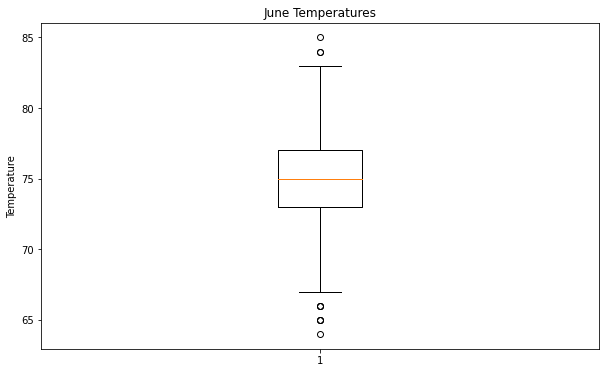

In [9]:
fix, ax = plt.subplots(figsize=(10,6))
ax.set_title('June Temperatures')
ax.set_ylabel('Temperature')
ax.boxplot(june_df["Temperature"])

## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
d2010 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2010-12-01' AND '2010-12-31') ORDER BY Measurement.date").fetchall()
d2011 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2011-12-01' AND '2011-12-31') ORDER BY Measurement.date").fetchall()
d2012 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2012-12-01' AND '2012-12-31') ORDER BY Measurement.date").fetchall()
d2013 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2013-12-01' AND '2013-12-31') ORDER BY Measurement.date").fetchall()
d2014 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2014-12-01' AND '2014-12-31') ORDER BY Measurement.date").fetchall()
d2015 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2015-12-01' AND '2015-12-31') ORDER BY Measurement.date").fetchall()
d2016 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2016-12-01' AND '2016-12-31') ORDER BY Measurement.date").fetchall()
d2017 = engine.execute("SELECT Measurement.date, Measurement.tobs FROM Measurement WHERE(Measurement.date BETWEEN '2017-12-01' AND '2017-12-31') ORDER BY Measurement.date").fetchall()

d2010

[('2010-12-01', 76.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 78.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 70.0),
 ('2010-12-01', 71.0),
 ('2010-12-02', 72.0),
 ('2010-12-02', 73.0),
 ('2010-12-02', 75.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 73.0),
 ('2010-12-03', 71.0),
 ('2010-12-03', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 72.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 67.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 72.0),
 ('2010-12-04', 78.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 75.0),
 ('2010-12-04', 77.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 71.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 78.0),
 ('2010-12-05', 66.0),
 ('2010-12-05', 69.0),
 ('2010-12-05', 69.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 78.0),
 ('2010-12-

In [11]:
# 7. Convert the December temperatures to a list.
type(d2010)

list

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
d2010_df = pd.DataFrame(d2010, columns = ['Date', 'Temperature'])
d2011_df = pd.DataFrame(d2011, columns = ['Date', 'Temperature'])
d2012_df = pd.DataFrame(d2012, columns = ['Date', 'Temperature'])
d2013_df = pd.DataFrame(d2013, columns = ['Date', 'Temperature'])
d2014_df = pd.DataFrame(d2014, columns = ['Date', 'Temperature'])
d2015_df = pd.DataFrame(d2015, columns = ['Date', 'Temperature'])
d2016_df = pd.DataFrame(d2016, columns = ['Date', 'Temperature'])
d2017_df = pd.DataFrame(d2017, columns = ['Date', 'Temperature'])

d2010_df

,Date,Temperature
0,2010-12-01,76.0
1,2010-12-01,73.0
2,2010-12-01,73.0
3,2010-12-01,72.0
4,2010-12-01,78.0
...,...,...
230,2010-12-31,75.0
231,2010-12-31,69.0
232,2010-12-31,77.0
233,2010-12-31,76.0


In [13]:
# append the dataframes
ddf = d2010_df.append(d2011_df)
ddf1 = ddf.append(d2012_df)
ddf2 = ddf1.append(d2013_df)
ddf3 = ddf2.append(d2014_df)
ddf4 = ddf3.append(d2015_df)
ddf5 = ddf4.append(d2016_df)
dec_df = ddf5.append(d2017_df)
dec_df

,Date,Temperature
0,2010-12-01,76.0
1,2010-12-01,73.0
2,2010-12-01,73.0
3,2010-12-01,72.0
4,2010-12-01,78.0
...,...,...
195,2016-12-31,66.0
196,2016-12-31,71.0
197,2016-12-31,72.0
198,2016-12-31,67.0


In [14]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x19039418608>,
 'caps': [<matplotlib.lines.Line2D at 0x19039418508>,
 'boxes': [<matplotlib.lines.Line2D at 0x190394180c8>],
 'medians': [<matplotlib.lines.Line2D at 0x19039418408>],
 'fliers': [<matplotlib.lines.Line2D at 0x19039418788>],
 'means': []}

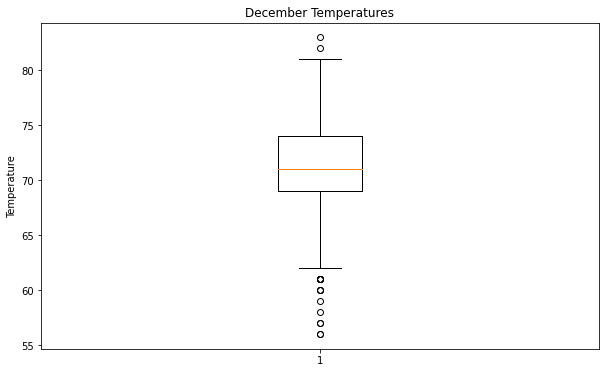

In [15]:
fix, ax = plt.subplots(figsize=(10,6))
ax.set_title('December Temperatures')
ax.set_ylabel('Temperature')
ax.boxplot(dec_df["Temperature"])